# Analysis of the Covid-19 containment measures Global v/s US - Project Proposal
I plan to compare the data from the WHO’s Covid-19 ‘confirmation of infection’ time series for both the Global and US datasets. I believe this data will show that Globally, the containment measures were more effective than they were in the US.

The datasets I plan to use are from Kaggle and consist of: USA Covid19-confirmed time series, and the Global Covid19-confirmed time series; Global dataset 1/22/2020 to 12/30/2020 (containing 271 rows and 348 columns)
U.S. dataset 1/22/2020 to 12/07/2020 (containing 3340 rows and 332 columns), as well as seeing what trends appear along the timeline of infection rate increased over the timeline indicated. I will be working with datetime. integers, and floats.

The final data that I will be examining, is the Percent of Total Covid-19 infection rates by Global and US.

By performing some initial tests on the individual data sets using Python, I will get a better sense of the data I have, then I will merge, clean, and model my analysis. I will be identifying effects, analyzing trends, and apply testing methods as well to validate my findings. Then I will create visualizations of the completed analysis using Python.

My hypothesis is that there will be significant data showing a strong correlation between Global COVID-19 containment measures being more effective than the US containment measures.

Those who would find my findings valuable are health officials, who can use the data to help them prove how effective containment measures are to those who do not believe in following such measures.



# Loading libraries
  Exploration, cleaning and reshaping of the Covid-19 portion of the dataframe


In [ ]:
# Import & alias modules

import math
import os
import glob
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()





# US Covid-19 data load and explore


In [ ]:
#start by loading in the files
#cu_df = Confimed US
cu_df = pd.read_csv('https://raw.githubusercontent.com/cdcosby/Capstone/main/coviddata/time_series_covid19_confirmed_US.csv')


In [ ]:
# See what the data looks like
cu_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2134,2154,2168,2182,2195,2210,2229,2244,2257,2286,2307,2328,2328,2351,2385,2417,2435,2456,2481,2506,2529,2554,2580,2597,2617,2634,2661,2686,2704,2716,2735,2751,2780,2818,2873,2893,2945,2979,3005,3043
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6879,6931,6955,6974,6991,7054,7093,7133,7184,7226,7263,7345,7348,7409,7454,7523,7596,7646,7696,7772,7849,7933,8038,8131,8199,8269,8376,8473,8576,8603,8733,8820,8890,9051,9163,9341,9501,9626,9728,9821
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1053,1058,1059,1062,1073,1077,1079,1089,1092,1095,1098,1107,1107,1112,1113,1117,1123,1128,1130,1134,1137,1145,1151,1157,1160,1161,1167,1170,1170,1171,1173,1175,1178,1189,1206,1214,1217,1219,1223,1224
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,867,873,877,883,890,900,907,920,926,934,942,948,948,961,966,973,978,986,993,1004,1008,1011,1024,1036,1136,1142,1157,1162,1170,1173,1179,1188,1196,1204,1239,1252,1270,1283,1293,1299
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2054,2089,2109,2128,2178,2204,2233,2258,2290,2302,2338,2378,2378,2400,2429,2488,2518,2549,2574,2594,2648,2683,2704,2735,2754,2763,2822,2855,2879,2888,2922,2946,2997,3061,3100,3158,3231,3281,3299,3324


In [ ]:
# Getting a more focused look at the data
cu_df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 332 columns):
 #   Column          Dtype  
---  ------          -----  
 0   UID             int64  
 1   iso2            object 
 2   iso3            object 
 3   code3           int64  
 4   FIPS            float64
 5   Admin2          object 
 6   Province_State  object 
 7   Country_Region  object 
 8   Lat             float64
 9   Long_           float64
 10  Combined_Key    object 
 11  1/22/20         int64  
 12  1/23/20         int64  
 13  1/24/20         int64  
 14  1/25/20         int64  
 15  1/26/20         int64  
 16  1/27/20         int64  
 17  1/28/20         int64  
 18  1/29/20         int64  
 19  1/30/20         int64  
 20  1/31/20         int64  
 21  2/1/20          int64  
 22  2/2/20          int64  
 23  2/3/20          int64  
 24  2/4/20          int64  
 25  2/5/20          int64  
 26  2/6/20          int64  
 27  2/7/20          int64  
 28  2/8/20          i

In [ ]:
cu_df.describe()

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,...,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20
count,3.340000e+03,3340.000000,3330.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,...,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000
mean,8.342958e+07,834.491617,33061.684685,36.707212,-88.601474,0.000299,0.000299,0.000599,0.000599,0.001497,0.001497,0.001497,0.001796,0.001796,0.002395,0.002395,0.002395,0.003293,0.003293,0.003293,0.003593,0.003593,0.003593,0.003593,0.003593,0.003892,0.003892,0.004192,0.004192,0.004192,0.004192,0.004192,0.004192,0.004192,0.004192,0.004790,0.004790,0.004790,0.004790,0.004790,...,2678.335928,2707.832635,2734.460479,2757.086527,2782.082635,2819.373952,2850.174251,2887.955689,2925.592814,2963.926946,2996.868862,3033.159281,3074.385030,3117.393713,3165.641317,3218.805389,3268.730539,3309.431437,3356.682934,3404.758982,3455.810778,3512.108084,3570.646407,3623.968862,3666.725449,3718.077246,3769.870060,3824.147605,3857.277545,3918.808683,3965.479341,4006.986228,4054.247006,4108.329940,4168.237425,4233.406287,4301.609880,4365.641617,4418.228443,4475.838024
std,4.315345e+06,36.498055,18638.940791,9.062922,21.718982,0.017303,0.017303,0.024467,0.024467,0.038668,0.038668,0.038668,0.042352,0.042352,0.054673,0.054673,0.054673,0.071278,0.071278,0.071278,0.073334,0.073334,0.073334,0.073334,0.073334,0.075334,0.075334,0.081063,0.081063,0.081063,0.081063,0.081063,0.081063,0.081063,0.081063,0.084645,0.084645,0.084645,0.084645,0.084645,...,10207.094236,10273.983710,10342.083707,10414.225564,10484.670245,10558.110680,10637.583902,10736.238781,10843.137858,10944.778600,11023.106108,11132.864852,11242.477815,11350.863878,11474.226829,11612.340447,11742.925407,11873.340124,11998.391367,12121.650397,12257.061802,12431.570132,12592.567049,12752.853558,12878.983746,13033.597681,13185.053658,13345.357625,13462.841151,13627.128047,13754.439992,13899.842443,14038.988476,14240.891146,14419.718413,14634.842466,14852.116225,15071.952938,15291.758640,15477.533337
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [ ]:
cu_df.isnull().sum().sum()

16

This is the end of the initial exploration of the data, further modifications will be performed in Reshaping the Covid-19 data frames

# Global Covid-19 data load and explore


In [ ]:
# Load in the files
#cg_df = Confimed Global
cg_df = pd.read_csv('https://raw.githubusercontent.com/cdcosby/Capstone/main/coviddata/time_series_covid19_confirmed_global.csv')

In [ ]:
# explore the data
cg_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,44503,44706,44988,45174,45384,45600,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306,47516,47716,47851,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681,49817,50013,50190,50433,50655,50810,50886,51039,51280,51350,51405
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,32196,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988,43683,44436,45188,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542,53003,53425,53814,54317,54827,55380,55755,56254,56572,57146,57727
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,73774,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252,88825,89416,90014,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781,95203,95659,96069,96549,97007,97441,97857,98249,98631,98988,99311
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6207,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050,7084,7127,7162,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560,7577,7602,7633,7669,7699,7756,7806,7821,7875,7919,7983
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14413,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591,15648,15729,15804,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626,16644,16686,16802,16931,17029,17099,17149,17240,17296,17371,17433


In [ ]:
cg_df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 348 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Province/State  object 
 1   Country/Region  object 
 2   Lat             float64
 3   Long            float64
 4   1/22/20         int64  
 5   1/23/20         int64  
 6   1/24/20         int64  
 7   1/25/20         int64  
 8   1/26/20         int64  
 9   1/27/20         int64  
 10  1/28/20         int64  
 11  1/29/20         int64  
 12  1/30/20         int64  
 13  1/31/20         int64  
 14  2/1/20          int64  
 15  2/2/20          int64  
 16  2/3/20          int64  
 17  2/4/20          int64  
 18  2/5/20          int64  
 19  2/6/20          int64  
 20  2/7/20          int64  
 21  2/8/20          int64  
 22  2/9/20          int64  
 23  2/10/20         int64  
 24  2/11/20         int64  
 25  2/12/20         int64  
 26  2/13/20         int64  
 27  2/14/20         int64  
 28  2/15/20         int

In [ ]:
cg_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20
count,270.000000,270.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,...,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02
mean,20.817839,23.439277,2.047970,2.413284,3.472325,5.291513,7.815498,10.800738,20.583026,22.756458,30.387454,36.630996,44.420664,61.944649,73.383764,88.184502,102.003690,113.664207,126.922509,137.011070,148.191882,157.819188,165.354244,166.896679,222.811808,246.896679,254.800738,262.859779,270.369004,277.313653,279.158672,281.225092,283.546125,290.044280,291.446494,293.527675,296.675277,300.280443,305.298893,310.416974,...,2.150144e+05,2.168164e+05,2.187314e+05,2.209062e+05,2.232531e+05,2.254096e+05,2.278860e+05,2.300953e+05,2.318899e+05,2.337551e+05,2.360005e+05,2.383891e+05,2.409443e+05,2.434563e+05,2.458286e+05,2.478188e+05,2.497195e+05,2.520719e+05,2.545423e+05,2.600554e+05,2.626350e+05,2.649339e+05,2.669582e+05,2.688934e+05,2.711975e+05,2.739053e+05,2.766227e+05,2.792707e+05,2.815451e+05,2.835149e+05,2.855147e+05,2.879002e+05,2.904522e+05,2.929300e+05,2.946553e+05,2.965469e+05,2.981444e+05,2.999478e+05,3.024042e+05,3.051955e+05
std,25.171460,72.529836,27.026899,27.125204,33.769345,46.999290,65.681295,88.495349,217.167147,218.495596,301.099493,356.981144,439.284756,682.678841,825.266404,1017.104559,1198.582763,1347.367299,1519.951236,1650.442523,1804.081336,1931.389855,2030.867727,2031.206896,2930.676869,3306.833170,3418.740376,3536.085769,3645.766602,3748.528307,3769.740388,3794.672005,3808.097996,3894.372899,3894.412420,3906.807907,3937.140087,3961.671313,3987.063559,4007.348121,...,1.022856e+06,1.031675e+06,1.041251e+06,1.051636e+06,1.062884e+06,1.070874e+06,1.082692e+06,1.092740e+06,1.101190e+06,1.110245e+06,1.121337e+06,1.133230e+06,1.146092e+06,1.159340e+06,1.171877e+06,1.182334e+06,1.192838e+06,1.205552e+06,1.218538e+06,1.234429e+06,1.248169e+06,1.260852e+06,1.271830e+06,1.282744e+06,1.294451e+06,1.309081e+06,1.323302e+06,1.337823e+06,1.349728e+06,1.360657e+06,1.371642e+06,1.383613e+06,1.397056e+06,1.409380e+06,1.416133e+06,1.428598e+06,1.437439e+06,1.447149e+06,1.459575e+06,1.473547e+06
min,-51.796300,-172.104600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00

In [ ]:
# Checking for nulls
cg_df.isnull().sum().sum()

190

This is the end of the initial exploration of the data, further modifications will be performed in Reshaping the Covid-19 data frames

# US preliminary histograms by end of month reports

With the current arrangement of the data, we can only look at one day at a time, skewing the histogram by having only one plotable datapoint. However, it does show a progression of confirmations as indicated by the changing axis notations, as observed further along the timeline series.

In [ ]:
#Exploring the data by end of month reporting, histograms
#cu_df = Confimed US
cu_df[['1/30/20']].describe()

,1/30/20
count,3340.000000
mean,0.001796
std,0.042352
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


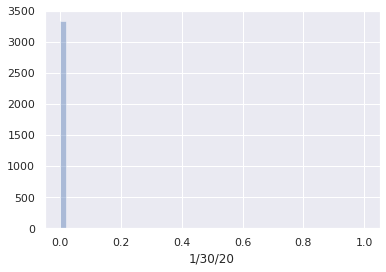

In [ ]:
ax = sns.distplot(cu_df['1/30/20'], kde=False)

In [ ]:
cu_df[['2/29/20']].describe()

,2/29/20
count,3340.000000
mean,0.007485
std,0.143558
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


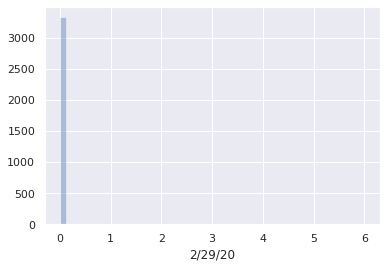

In [ ]:
ax = sns.distplot(cu_df['2/29/20'],kde=False)

In [ ]:
cu_df[['3/30/20']].describe()

,3/30/20
count,3340.000000
mean,49.658982
std,426.576066
min,0.000000
25%,0.000000
50%,1.000000
75%,8.000000
max,11669.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


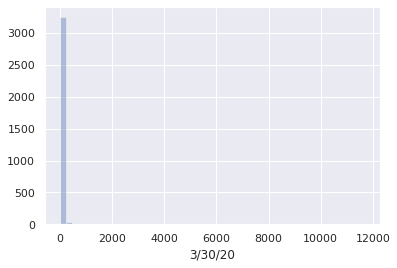

In [ ]:
ax = sns.distplot(cu_df['3/30/20'],kde=False)

In [ ]:
cu_df[['4/30/20']].describe()

,4/30/20
count,3340.000000
mean,322.222754
std,2147.025777
min,0.000000
25%,3.000000
50%,16.000000
75%,75.250000
max,51631.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


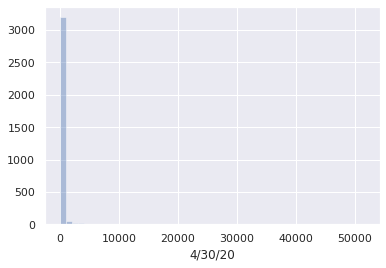

In [ ]:
ax = sns.distplot(cu_df['4/30/20'],kde=False)

In [ ]:
cu_df[['5/30/20']].describe()

,5/30/20
count,3340.000000
mean,531.565269
std,3041.575253
min,0.000000
25%,7.000000
50%,35.000000
75%,167.000000
max,77119.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


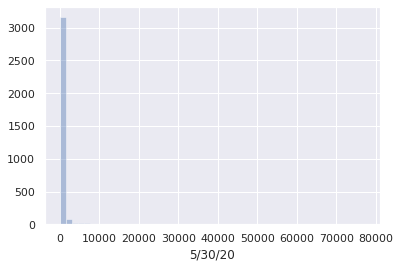

In [ ]:
ax = sns.distplot(cu_df['5/30/20'],kde=False)

In [ ]:
cu_df[['6/30/20']].describe()

,6/30/20
count,3340.000000
mean,787.073054
std,3928.666357
min,0.000000
25%,14.000000
50%,68.000000
75%,304.000000
max,103850.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


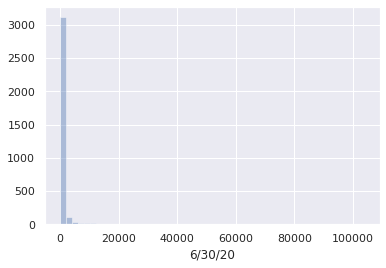

In [ ]:
ax = sns.distplot(cu_df['6/30/20'],kde=False)

In [ ]:
cu_df[['7/30/20']].describe()

,7/30/20
count,3340.000000
mean,1342.408084
std,6215.832032
min,0.000000
25%,40.000000
50%,160.000000
75%,606.000000
max,186036.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


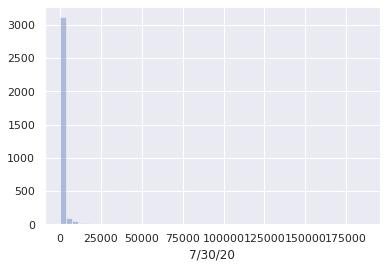

In [ ]:
ax = sns.distplot(cu_df['7/30/20'],kde=False)

In [ ]:
cu_df[['8/30/20']].describe()

,8/30/20
count,3340.000000
mean,1790.746108
std,7861.088941
min,0.000000
25%,72.000000
50%,268.000000
75%,912.250000
max,240749.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


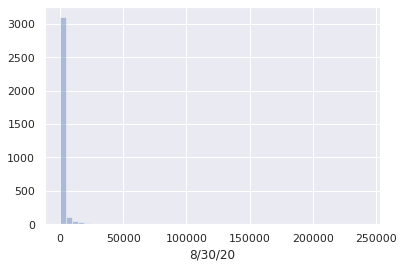

In [ ]:
ax = sns.distplot(cu_df['8/30/20'],kde=False)

In [ ]:
cu_df[['9/30/20']].describe()

,9/30/20
count,3340.000000
mean,2161.093413
std,8903.989343
min,0.000000
25%,116.750000
50%,385.500000
75%,1219.250000
max,270299.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


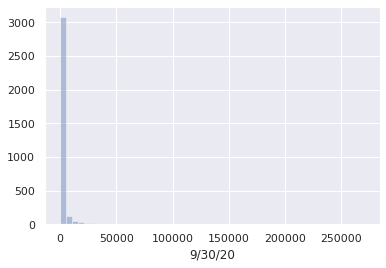

In [ ]:
ax = sns.distplot(cu_df['9/30/20'],kde=False)

In [ ]:
cu_df[['10/30/20']].describe()

,10/30/20
count,3340.000000
mean,2707.832635
std,10273.983710
min,0.000000
25%,199.750000
50%,578.500000
75%,1666.750000
max,306327.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


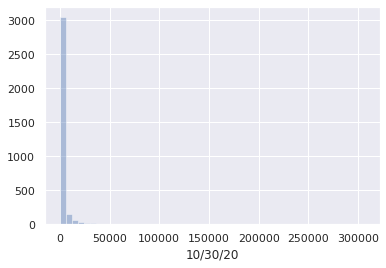

In [ ]:
ax = sns.distplot(cu_df['10/30/20'],kde=False)

In [ ]:
cu_df[['11/30/20']].describe()

,11/30/20
count,3340.000000
mean,4054.247006
std,14038.988476
min,0.000000
25%,386.000000
50%,995.000000
75%,2672.000000
max,400919.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


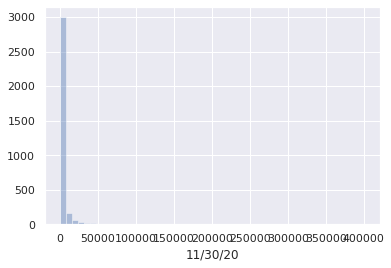

In [ ]:
ax = sns.distplot(cu_df['11/30/20'],kde=False)

In [ ]:
cu_df[['12/7/20']].describe()

,12/7/20
count,3340.000000
mean,4475.838024
std,15477.533337
min,0.000000
25%,437.000000
50%,1112.500000
75%,2968.000000
max,457880.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


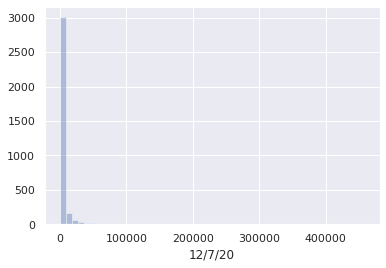

In [ ]:
ax = sns.distplot(cu_df['12/7/20'],kde=False)

# Global preliminary histograms by end of month reports

In [ ]:
#Exploring the data by end of month reporting, histograms
#cg_df = Confimed Global
cg_df[['1/30/20']].describe()

,1/30/20
count,271.000000
mean,30.387454
std,301.099493
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4903.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


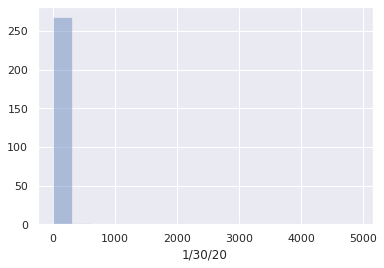

In [ ]:
ax = sns.distplot(cg_df['1/30/20'],kde=False)

In [ ]:
cg_df[['2/29/20']].describe()

,2/29/20
count,271.000000
mean,317.391144
std,4034.946706
min,0.000000
25%,0.000000
50%,0.000000
75%,3.500000
max,66337.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


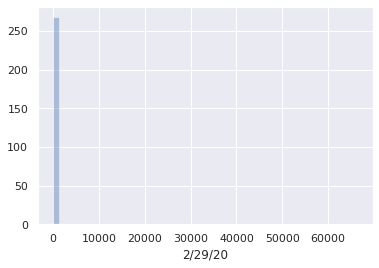

In [ ]:
ax = sns.distplot(cg_df['2/29/20'],kde=False)

In [ ]:
cg_df[['3/30/20']].describe()

,3/30/20
count,271.000000
mean,2947.933579
std,14684.212113
min,0.000000
25%,11.500000
50%,135.000000
75%,658.500000
max,165861.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


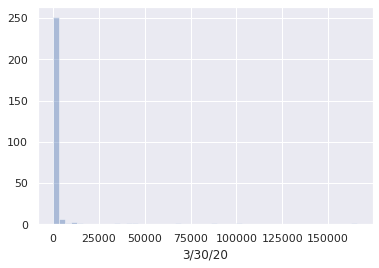

In [ ]:
ax = sns.distplot(cg_df['3/30/20'],kde=False)

In [ ]:
cg_df[['4/30/20']].describe()

,4/30/20
count,2.710000e+02
mean,1.209990e+04
std,7.105314e+04
min,0.000000e+00
25%,7.400000e+01
50%,4.420000e+02
75%,2.080500e+03
max,1.080161e+06


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


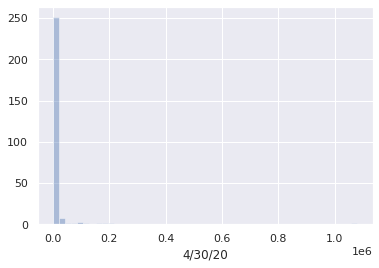

In [ ]:
ax = sns.distplot(cg_df['4/30/20'],kde=False)

In [ ]:
cg_df[['5/30/20']].describe()

,5/30/20
count,2.710000e+02
mean,2.243910e+04
std,1.194692e+05
min,0.000000e+00
25%,1.405000e+02
50%,8.210000e+02
75%,5.170000e+03
max,1.778241e+06


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


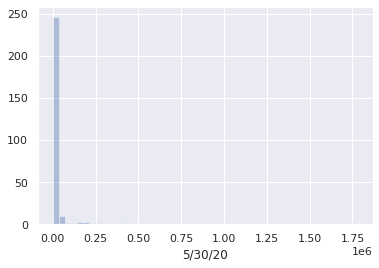

In [ ]:
ax = sns.distplot(cg_df['5/30/20'],kde=False)

In [ ]:
cg_df[['6/30/20']].describe()

,6/30/20
count,2.710000e+02
mean,3.855228e+04
std,1.928951e+05
min,0.000000e+00
25%,1.860000e+02
50%,1.118000e+03
75%,9.378000e+03
max,2.631894e+06


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


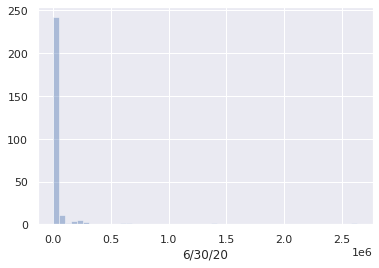

In [ ]:
ax = sns.distplot(cg_df['6/30/20'],kde=False)

In [ ]:
cg_df[['7/30/20']].describe()

,7/30/20
count,2.710000e+02
mean,6.384851e+04
std,3.381194e+05
min,0.000000e+00
25%,2.495000e+02
50%,1.805000e+03
75%,1.727250e+04
max,4.487660e+06


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


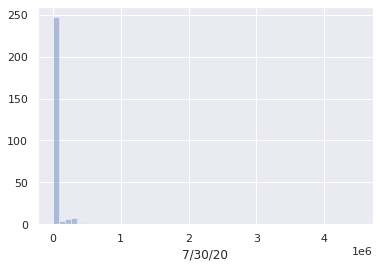

In [ ]:
ax = sns.distplot(cg_df['7/30/20'],kde=False)

In [ ]:
cg_df[['8/30/20']].describe()

,8/30/20
count,2.710000e+02
mean,9.313309e+04
std,4.933708e+05
min,0.000000e+00
25%,3.735000e+02
50%,2.624000e+03
75%,2.796300e+04
max,5.984336e+06


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


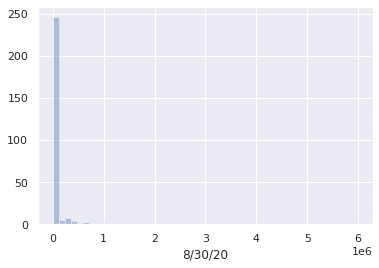

In [ ]:
ax = sns.distplot(cg_df['8/30/20'],kde=False)

In [ ]:
cg_df[['9/30/20']].describe()

,9/30/20
count,2.710000e+02
mean,1.254583e+05
std,6.614698e+05
min,0.000000e+00
25%,4.090000e+02
50%,4.200000e+03
75%,3.976650e+04
max,7.222881e+06


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


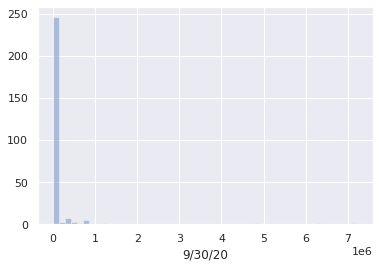

In [ ]:
ax = sns.distplot(cg_df['9/30/20'],kde=False)

In [ ]:
cg_df[['10/30/20']].describe()

,10/30/20
count,2.710000e+02
mean,1.684192e+05
std,8.299223e+05
min,0.000000e+00
25%,5.110000e+02
50%,5.514000e+03
75%,5.821150e+04
max,9.052200e+06


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


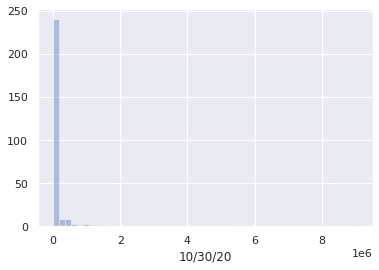

In [ ]:
ax = sns.distplot(cg_df['10/30/20'],kde=False)

In [ ]:
cg_df[['11/30/20']].describe()

,11/30/20
count,2.710000e+02
mean,2.337551e+05
std,1.110245e+06
min,0.000000e+00
25%,6.100000e+02
50%,6.745000e+03
75%,9.374100e+04
max,1.360787e+07


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


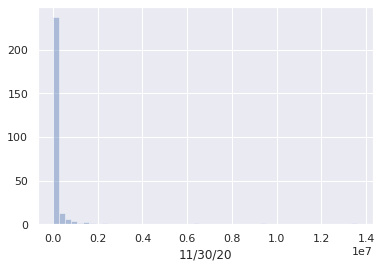

In [ ]:
ax = sns.distplot(cg_df['11/30/20'],kde=False)

In [ ]:
cg_df[['12/7/20']].describe()

,12/7/20
count,2.710000e+02
mean,2.497195e+05
std,1.192838e+06
min,0.000000e+00
25%,6.450000e+02
50%,7.579000e+03
75%,1.023800e+05
max,1.503020e+07


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


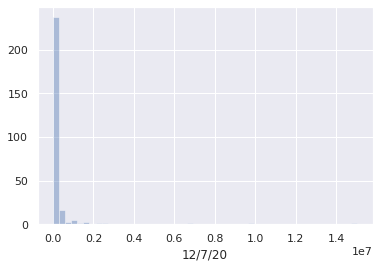

In [ ]:
ax = sns.distplot(cg_df['12/7/20'],kde=False)

# Reshaping the Covid-19 dataframes


The COVID-19 data for both the United States and the Global confirmation days contain irrelevant data columns which are the first 10 and 4 columns, respectively. The US irrelevant data also contains subcategories of state and county, and Global contains subcategories of country and providence. Although this would allow for an interesting exploration of tracking confirmations regionally by date, that is not the focus of this project. Therefore, the COVID-19 data frame simply needs to be reduced to a series, indexed by date with total numbers per day by US, Global, and Total.
By eliminating all non-essential data, we reduce the size of the data frame, allowing for a quicker runtime.

In [ ]:
# Starting with the US dataframe
# Dropping non relevant columns, we only want columns with date headers
# cu_df_mod = Covid US Modified
cu_df_mod = cu_df.drop(cu_df.columns[0:11],axis=1)
cu_df_mod.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 321 columns):
 #   Column    Dtype
---  ------    -----
 0   1/22/20   int64
 1   1/23/20   int64
 2   1/24/20   int64
 3   1/25/20   int64
 4   1/26/20   int64
 5   1/27/20   int64
 6   1/28/20   int64
 7   1/29/20   int64
 8   1/30/20   int64
 9   1/31/20   int64
 10  2/1/20    int64
 11  2/2/20    int64
 12  2/3/20    int64
 13  2/4/20    int64
 14  2/5/20    int64
 15  2/6/20    int64
 16  2/7/20    int64
 17  2/8/20    int64
 18  2/9/20    int64
 19  2/10/20   int64
 20  2/11/20   int64
 21  2/12/20   int64
 22  2/13/20   int64
 23  2/14/20   int64
 24  2/15/20   int64
 25  2/16/20   int64
 26  2/17/20   int64
 27  2/18/20   int64
 28  2/19/20   int64
 29  2/20/20   int64
 30  2/21/20   int64
 31  2/22/20   int64
 32  2/23/20   int64
 33  2/24/20   int64
 34  2/25/20   int64
 35  2/26/20   int64
 36  2/27/20   int64
 37  2/28/20   int64
 38  2/29/20   int64
 39  3/1/20    int64
 40  3/2/2

When I checked for nulls earlier, I had 16 occurrences, after dropping the irrelevant columns, I check again and find that all null values have been eliminated.

In [ ]:
# Checking for nulls
cu_df_mod.isnull().sum().sum()

0

In [ ]:
# outlining data frame to check layout
print(cu_df_mod.shape)
cu_df_mod.head()

(3340, 321)


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2134,2154,2168,2182,2195,2210,2229,2244,2257,2286,2307,2328,2328,2351,2385,2417,2435,2456,2481,2506,2529,2554,2580,2597,2617,2634,2661,2686,2704,2716,2735,2751,2780,2818,2873,2893,2945,2979,3005,3043
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6879,6931,6955,6974,6991,7054,7093,7133,7184,7226,7263,7345,7348,7409,7454,7523,7596,7646,7696,7772,7849,7933,8038,8131,8199,8269,8376,8473,8576,8603,8733,8820,8890,9051,9163,9341,9501,9626,9728,9821
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1053,1058,1059,1062,1073,1077,1079,1089,1092,1095,1098,1107,1107,1112,1113,1117,1123,1128,1130,1134,1137,1145,1151,1157,1160,1161,1167,1170,1170,1171,1173,1175,1178,1189,1206,1214,1217,1219,1223,1224
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,867,873,877,883,890,900,907,920,926,934,942,948,948,961,966,973,978,986,993,1004,1008,1011,1024,1036,1136,1142,1157,1162,1170,1173,1179,1188,1196,1204,1239,1252,1270,1283,1293,1299
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2054,2089,2109,2128,2178,2204,2233,2258,2290,2302,2338,2378,2378,2400,2429,2488,2518,2549,2574,2594,2648,2683,2704,2735,2754,2763,2822,2855,2879,2888,2922,2946,2997,3061,3100,3158,3231,3281,3299,3324


Looking at the shape above, we can see that we have 321 'day' columns, and 3340 individual confirmation data points.

Now that we have the data pared down to just what we want to look at, we need to sum each column to the daily totals.

To do this we need to sum and check the shape to verify we are down to one column of values, with the dates becoming the index.

In [ ]:
cu_mod_df = cu_df_mod.sum()
cu_mod_df.shape


(321,)

In [ ]:
cu_mod_df.head()

1/22/20    1
1/23/20    1
1/24/20    2
1/25/20    2
1/26/20    5
dtype: int64

In [ ]:
# We now need to repeat these modifications to the Global dataframe
# cg_df_mod = Covid Global Modified
# Dropping non relevant columns, we only want columns with date headers
cg_df_mod = cg_df.drop(cg_df.columns[0:4],axis=1)
cg_df_mod.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 344 columns):
 #   Column    Dtype
---  ------    -----
 0   1/22/20   int64
 1   1/23/20   int64
 2   1/24/20   int64
 3   1/25/20   int64
 4   1/26/20   int64
 5   1/27/20   int64
 6   1/28/20   int64
 7   1/29/20   int64
 8   1/30/20   int64
 9   1/31/20   int64
 10  2/1/20    int64
 11  2/2/20    int64
 12  2/3/20    int64
 13  2/4/20    int64
 14  2/5/20    int64
 15  2/6/20    int64
 16  2/7/20    int64
 17  2/8/20    int64
 18  2/9/20    int64
 19  2/10/20   int64
 20  2/11/20   int64
 21  2/12/20   int64
 22  2/13/20   int64
 23  2/14/20   int64
 24  2/15/20   int64
 25  2/16/20   int64
 26  2/17/20   int64
 27  2/18/20   int64
 28  2/19/20   int64
 29  2/20/20   int64
 30  2/21/20   int64
 31  2/22/20   int64
 32  2/23/20   int64
 33  2/24/20   int64
 34  2/25/20   int64
 35  2/26/20   int64
 36  2/27/20   int64
 37  2/28/20   int64
 38  2/29/20   int64
 39  3/1/20    int64
 40  3/2/20 

In [ ]:
# Checking for nulls
# Checking for nulls
cg_df_mod.isnull().sum().sum()

0

In [ ]:
# outlining data frame to check layout
print(cg_df_mod.shape)
cg_df_mod.head()

(271, 344)


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,44503,44706,44988,45174,45384,45600,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306,47516,47716,47851,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681,49817,50013,50190,50433,50655,50810,50886,51039,51280,51350,51405
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,32196,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988,43683,44436,45188,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542,53003,53425,53814,54317,54827,55380,55755,56254,56572,57146,57727
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,73774,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252,88825,89416,90014,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781,95203,95659,96069,96549,97007,97441,97857,98249,98631,98988,99311
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6207,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050,7084,7127,7162,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560,7577,7602,7633,7669,7699,7756,7806,7821,7875,7919,7983
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14413,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591,15648,15729,15804,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626,16644,16686,16802,16931,17029,17099,17149,17240,17296,17371,17433


In [ ]:
cg_mod_df = cg_df_mod.sum()
cg_mod_df.shape

(344,)

In [ ]:
cg_mod_df.head()

1/22/20     555
1/23/20     654
1/24/20     941
1/25/20    1434
1/26/20    2118
dtype: int64

# Merging Covid-19 Dataframes

We start by merging the two series, perform some cleaning and editing for visual edification. We then sum to provide a 'Total' daily confirmation rate, which we will then use to calculate % of Total confirmation for each of the Global and US columns.

In [ ]:
# Concatenating US and Global dataframes into one
# both_df = US and Global data merged into new dataframe

both_df = pd.concat([cg_mod_df, cu_mod_df], axis=1)
both_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 1/22/20 to 12/30/20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       344 non-null    int64  
 1   1       321 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.1+ KB


In [ ]:
#Checking for validity

both_df.head()

,0,1
1/22/20,555,1.0
1/23/20,654,1.0
1/24/20,941,2.0
1/25/20,1434,2.0
1/26/20,2118,5.0


In [ ]:
# Renaming the columns for identification
#covid_df = completed merge by renaming columns

covid_df = both_df.set_axis(['Global', 'US'], axis=1)
covid_df


,Global,US
1/22/20,555,1.0
1/23/20,654,1.0
1/24/20,941,2.0
1/25/20,1434,2.0
1/26/20,2118,5.0
...,...,...
12/26/20,80364202,NaN
12/27/20,80797122,NaN
12/28/20,81285853,NaN
12/29/20,81951541,NaN


Note that the individual date sets for Global and US have slightly different reporting dates, so we are observing nulls appearing in our data again

In [ ]:
# checking for nulls

covid_df.isnull().sum().sum()

23

In [ ]:
# Dropping nulls, validating, and checking merged data for consistency
# dn_df = Dropping Nulls

dn_df = covid_df.dropna()
print(dn_df.isnull().sum().sum())
dn_df.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 1/22/20 to 12/7/20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Global  321 non-null    int64  
 1   US      321 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.5+ KB


In [ ]:
dn_df

,Global,US
1/22/20,555,1.0
1/23/20,654,1.0
1/24/20,941,2.0
1/25/20,1434,2.0
1/26/20,2118,5.0
...,...,...
12/3/20,65295914,14139577.0
12/4/20,65976648,14367377.0
12/5/20,66619544,14581243.0
12/6/20,67158896,14756883.0


Here we observe that the Global dtype is int64, and the US Dtype is float64, when they should both be int64. We will update the Dtype for the US.


In [ ]:
# Convert the Dtype to int64 to get rid of the floading points in the US data

dn_df = dn_df.astype(int)
dn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 1/22/20 to 12/7/20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Global  321 non-null    int64
 1   US      321 non-null    int64
dtypes: int64(2)
memory usage: 7.5+ KB


Now we need to add a totals column and will contain the total value of Global plus the total value of US for each day

In [ ]:
# tcr = Total Covid Results

tcr_df = dn_df.assign(Total = dn_df.Global + dn_df.US)
tcr_df.head(3)

,Global,US,Total
1/22/20,555,1,556
1/23/20,654,1,655
1/24/20,941,2,943


Then we find our percent of total for Global, and then for the US

In [ ]:
# ccr_df = Complete Covid Records

acr_df = tcr_df.assign(GPR = tcr_df.Global / tcr_df.Total*100)
ccr_df = acr_df.assign(USPR = acr_df.US / acr_df.Total*100)
ccr_df.head()

,Global,US,Total,GPR,USPR
1/22/20,555,1,556,99.820144,0.179856
1/23/20,654,1,655,99.847328,0.152672
1/24/20,941,2,943,99.787911,0.212089
1/25/20,1434,2,1436,99.860724,0.139276
1/26/20,2118,5,2123,99.764484,0.235516


# Now we find our percent of total

We need to move the date field out of the index position

In [ ]:
# Reset the index of dataframe
# mad_df = Modified All Data

mad_df = ccr_df.reset_index()

print(mad_df)

       index    Global        US     Total        GPR       USPR
0    1/22/20       555         1       556  99.820144   0.179856
1    1/23/20       654         1       655  99.847328   0.152672
2    1/24/20       941         2       943  99.787911   0.212089
3    1/25/20      1434         2      1436  99.860724   0.139276
4    1/26/20      2118         5      2123  99.764484   0.235516
..       ...       ...       ...       ...        ...        ...
316  12/3/20  65295914  14139577  79435491  82.199925  17.800075
317  12/4/20  65976648  14367377  80344025  82.117678  17.882322
318  12/5/20  66619544  14581243  81200787  82.042978  17.957022
319  12/6/20  67158896  14756883  81915779  81.985299  18.014701
320  12/7/20  67673996  14949299  82623295  81.906678  18.093322

[321 rows x 6 columns]


In [ ]:
# Renaming 'index' to 'Date'

mad_df = mad_df.rename(columns = {'index':'Date'})

print(mad_df)

        Date    Global        US     Total        GPR       USPR
0    1/22/20       555         1       556  99.820144   0.179856
1    1/23/20       654         1       655  99.847328   0.152672
2    1/24/20       941         2       943  99.787911   0.212089
3    1/25/20      1434         2      1436  99.860724   0.139276
4    1/26/20      2118         5      2123  99.764484   0.235516
..       ...       ...       ...       ...        ...        ...
316  12/3/20  65295914  14139577  79435491  82.199925  17.800075
317  12/4/20  65976648  14367377  80344025  82.117678  17.882322
318  12/5/20  66619544  14581243  81200787  82.042978  17.957022
319  12/6/20  67158896  14756883  81915779  81.985299  18.014701
320  12/7/20  67673996  14949299  82623295  81.906678  18.093322

[321 rows x 6 columns]


Changing the date column to 'datetime' so it can be summed by month

In [ ]:
# Changing attribute of date column

mad_df["Date"] = pd.to_datetime(mad_df['Date'])
mad_df.head()

,Date,Global,US,Total,GPR,USPR
0,2020-01-22,555,1,556,99.820144,0.179856
1,2020-01-23,654,1,655,99.847328,0.152672
2,2020-01-24,941,2,943,99.787911,0.212089
3,2020-01-25,1434,2,1436,99.860724,0.139276
4,2020-01-26,2118,5,2123,99.764484,0.235516


# Visualizations of the prepared Covid-19 data

We then visualize the data...At this point we are only interested in the comparison of USPR and GPR and their relationship as compared against Total.

Looking at the plots below, we observe that as a percent of total, the first scatterplot representing the USPR (United States Percentage Rate) begins without a high correlation between the Total number of cases and those reported in the US as reflected in the USPR. Observing the increase over time, in a positive correlation shows the increase in observations in relation to the total. This indicates the US containment initiative to be ineffective.

Moving on to the GPR (Global Percentage Rate), we observe an initially high correlation between the Total number of reported cases and those reported Globally as reflected in the GPR. Noting the reduction over time, in a negative correlation shows the decrease in observations in relation to the total. This indicates the Global containment initiative to be effective.

By comparing the 'mirrored image' plots shown in these two scatterplots, a validation of the hypothesis can be observed. Despite initially high numbers in the beginning, the Global containment initiative was much more effective than the US containment initiative.

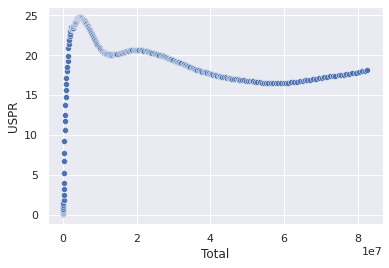

In [ ]:
sns.scatterplot(x='Total', y ='USPR', data=mad_df)

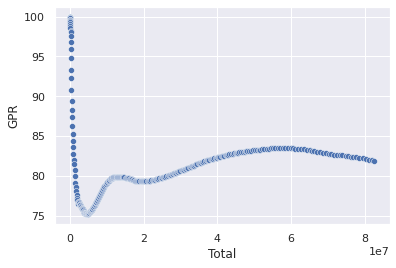

In [ ]:
sns.scatterplot(x='Total', y ='GPR', data=mad_df)

Looking at this from another angle....

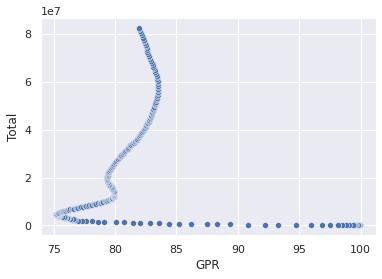

In [ ]:
sns.scatterplot(x='GPR', y ='Total', data=mad_df)

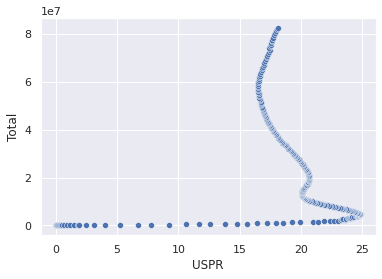

In [ ]:
sns.scatterplot(x='USPR', y ='Total', data=mad_df)

In this scatterplot comparing GPR and USPR, there is a strong linear correlation, as indicated by the almost straight 45 degree angle.

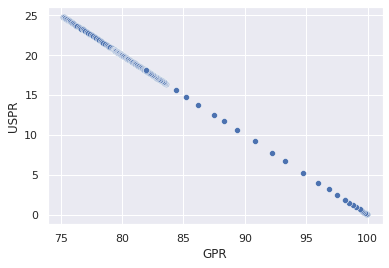

In [ ]:
sns.scatterplot(x='GPR', y ='USPR', data=mad_df)

Here we look at a pair plot to see if there is anything else to observe.

In the bar charts, we can see a reflection of the scatterplots 'mirrored images'.

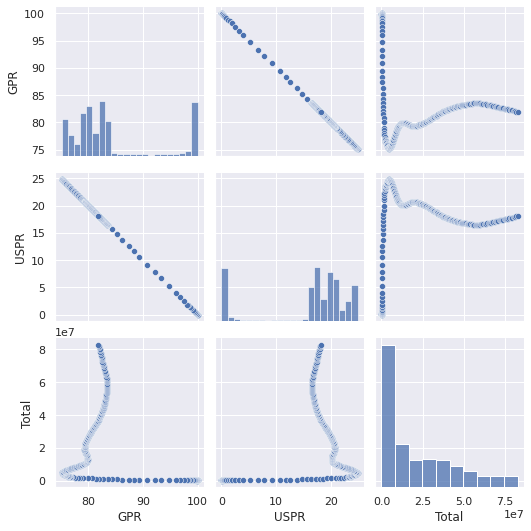

In [ ]:
sns.pairplot(mad_df, vars = ["GPR","USPR","Total"])

For a comparison of histograms, we group plot for easy inspection.

Again, we observe clear indicators of spread and containment across time.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cf5ecbb70>,
      dtype=object)

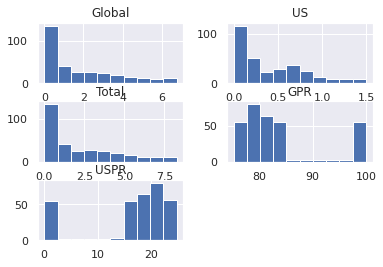

In [ ]:
mad_df.hist()

We then look at the data with a box plot to observe the shape of the distribution, its central value, its variability and outliers.

Comparing the data from USPR and GPR, we observe that both GPR's highest and lowest confirmed case count are higher than USPR's corresponding case count. This shows a consistently higher rate of confirmed cases Globally than the US.


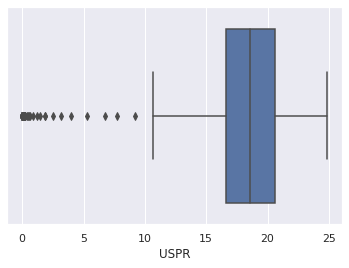

In [ ]:
sns.boxplot(x = mad_df['USPR'])

In [ ]:
mad_df[['USPR']].describe()

,USPR
count,321.000000
mean,16.199475
std,7.895858
min,0.018366
25%,16.590472
50%,18.549769
75%,20.621878
max,24.825807


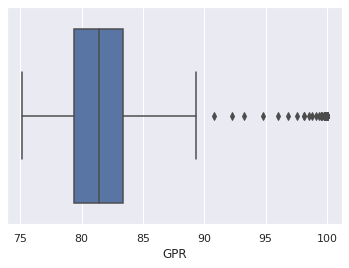

In [ ]:
sns.boxplot(x = mad_df['GPR'])

In [ ]:
mad_df[['GPR']].describe()

,GPR
count,321.000000
mean,83.800525
std,7.895858
min,75.174193
25%,79.378122
50%,81.450231
75%,83.409528
max,99.981634


In comparing the GPR plot to the USPR plot, we can see that the density of confirmation in Global cases were higher in the beginning, leveling off and then spiking again towards the end of the year. However, when you look at the USPR, we can see that there was a initial spike when the first cases were reported, and a large a secondary spike later in the year which continued to increase then remained steady. This shows that the US measures for control of spread was not as efficient as the Global control measures.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


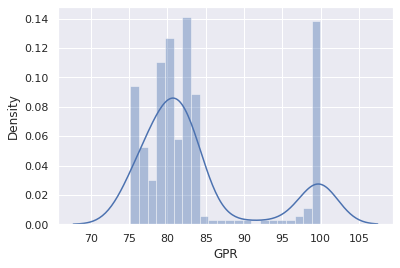

In [ ]:
sns. distplot(mad_df['GPR'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


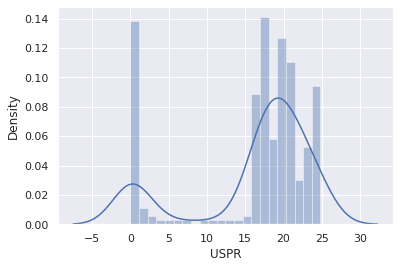

In [ ]:
sns. distplot(mad_df['USPR'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


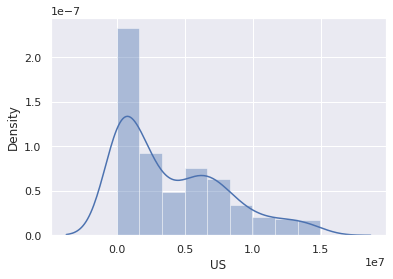

In [ ]:
sns. distplot(mad_df['US'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


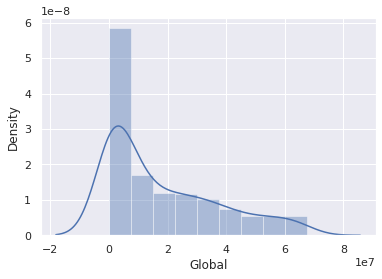

In [ ]:
sns. distplot(mad_df['Global'])

Now we run a pearsonr test to validate my observations.

In [ ]:
stats.pearsonr(mad_df['Global'], mad_df['US'])

(0.9956845956729282, 0.0)

In [ ]:
stats.pearsonr(mad_df['GPR'], mad_df['USPR'])

(-0.9999999999999999, 0.0)

As we observe in the pearsonr results, the correlation coefficient for both the case counts and the percentage of totals of the US and Global data are -0.999 and 0.995 respectively. This shows a very strong correlation. If we move on to the probability factor is, in fact 0.00 for both, indicating that the correlation being random, is an impossibility.

# Conclusions
Note: This data only tracks confirmation rates over time, and does not take into account *any* outside factors that may have had any effect on the rate of spread.

The global population as of January 1, 2020, not including the US, was projected to be a massive 7,290,796,536 people compared to the US population of 330,222,422 people (Citation: Census Bureau Projects U.S. and World Populations on New Year’s Day DECEMBER 30, 2019; RELEASE NUMBER CB19-199). Even though the US population is just 4.52% of the total global population, our results show a very different picture of overall results for each group. This analysis shows that the US failed in having effective containment measures in place, or in developing such measures over time, as the pandemic continued to progress.

As we have observed while analyzing this data, despite having the majority of the confirmed cases of Covid-19, the Global communities control initiatives were considerably more effective than that of the US communities.

This suggests to me that a deeper dive is indicated. By zooming in to the Global data to analyze by country, which had the most effective measures. I believe that by using that information as a framework, an extrapolation of effective measures can be crafted into a best practices guide for the US to follow for future types of occurrences.



In [ ]:
mad_df['Global'].sum()

5801707424

In [ ]:
mad_df['US'].sum()

1294628392

In [ ]:
mad_df['Total'].sum()

7096335816